#### Import numpy, matplotlib.pyplot and make it inline

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

To have a dataset or set of data points, generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that:
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [ ]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [ ]:
a=-1
b=2
y=a*X+b
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

#### Plot X vs. y

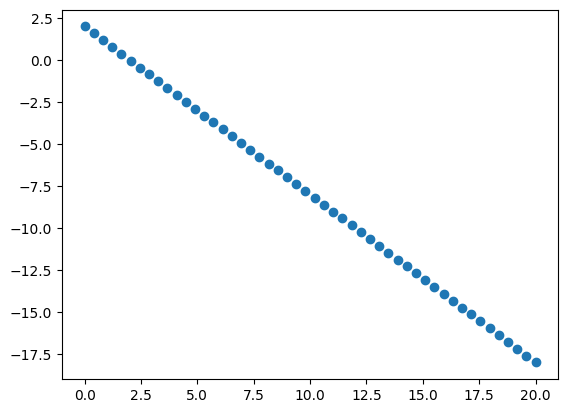

In [ ]:
plt.scatter(X,y)

ADAGRAD

In [ ]:
def adagrad(x , y , LR , epsilon ,iters):
  loss = []
  theta0s = []
  theta1s = []
  theta0 = 0
  theta1 = 0
  hypos = []
  prev_cost = float('inf')
  m = len(X)
  v_theta0 = 0
  v_theta1 = 0

  for i in range(iters):
    print("**********iteration",i,"**********\n")
    theta0s.append(theta0)
    theta1s.append(theta1)
    print("theta 0 ", theta0,"\n")
    print("theta 1 ", theta1,"\n")

    h = theta0 + theta1*x
    hypos.append(h)
    print("h ", h,"\n")
    error_vec = h-y
    print("errorvec " ,error_vec,"\n")
    j = np.mean(error_vec**2) / 2
    loss.append(j)
    print("j ",j,"\n")
    d_theta0 = np.sum(error_vec) / m
    d_theta1 = np.sum(error_vec*x)  / m
    gradvec = np.array([d_theta0,d_theta1])
    print("grad vector ", gradvec,"\n")
    gradvecNorm = np.linalg.norm(gradvec)
    print("grad vector norm ", gradvecNorm,"\n")


    if gradvecNorm < 0.001 or abs(prev_cost - j) < 0.001:
      break
    else:
      prev_cost = j
      #update v
      v_theta0 = v_theta0 + (d_theta0 **2)
      v_theta1 = v_theta1 + (d_theta1 **2)

      theta0 = theta0 - (LR/ (np.sqrt(v_theta0)+epsilon) )* d_theta0   #update theta
      theta1 = theta1 - (LR/ (np.sqrt(v_theta1)+epsilon) )* d_theta1



  return theta0s, theta1s, loss, theta0, theta1 , h , hypos

##### The following results uses alpha = 0.05, epsilon =  1e-08, and max. iterations = 500.

In [ ]:
theta0s, theta1s, loss, theta0, theta1 , h , hypos = adagrad(X,y,0.05, 1e-08, 500)

Streaming output truncated to the last 5000 lines.
 -13.22645271 -13.5064168  -13.7863809  -14.06634499 -14.34630908] 

errorvec  [-2.62806857 -2.4998694  -2.37167022 -2.24347105 -2.11527188 -1.9870727
 -1.85887353 -1.73067436 -1.60247518 -1.47427601 -1.34607684 -1.21787766
 -1.08967849 -0.96147932 -0.83328014 -0.70508097 -0.5768818  -0.44868263
 -0.32048345 -0.19228428 -0.06408511  0.06411407  0.19231324  0.32051241
  0.44871159  0.57691076  0.70510993  0.83330911  0.96150828  1.08970745
  1.21790663  1.3461058   1.47430497  1.60250415  1.73070332  1.85890249
  1.98710167  2.11530084  2.24350001  2.37169919  2.49989836  2.62809753
  2.75629671  2.88449588  3.01269505  3.14089423  3.2690934   3.39729257
  3.52549175  3.65369092] 

j  1.8427849438575519 

grad vector  [ 0.51281117 16.02504147] 

grad vector norm  16.03324451020824 

**********iteration 116 **********

theta 0  -0.6288367516995488 

theta 1  -0.6874375477847721 

h  [ -0.62883675  -0.90942351  -1.19001026  -1.47059701  -

In [ ]:
from sklearn.metrics import r2_score
r2_score(y,h)

0.9484638125790851

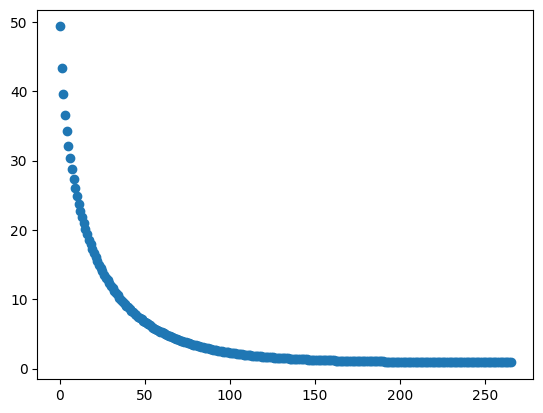

In [ ]:
epochs = list(range(len(loss)))
plt.scatter(epochs, loss)


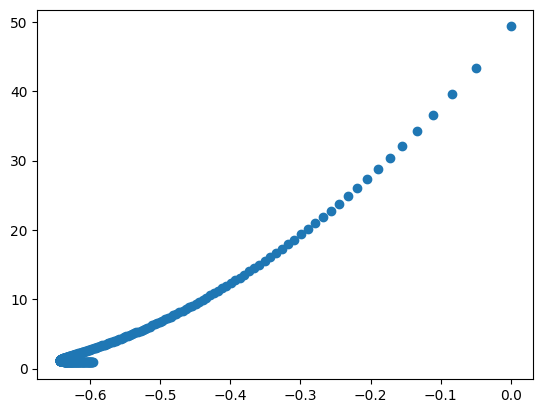

In [ ]:
plt.scatter(theta0s,loss)

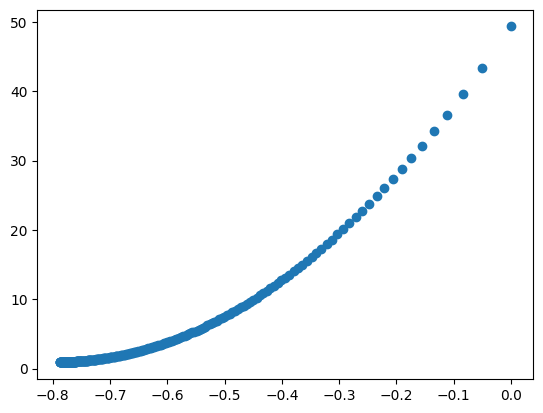

In [ ]:
plt.scatter(theta1s,loss)

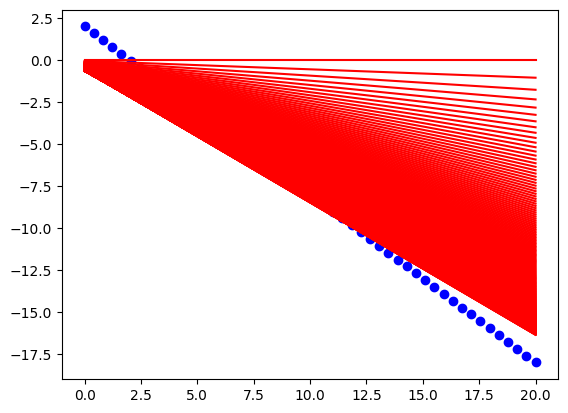

In [ ]:
plt.scatter(X,y,color='blue')
for i in range(len(hypos)):
  plt.plot(X,hypos[i],color='red')
  plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

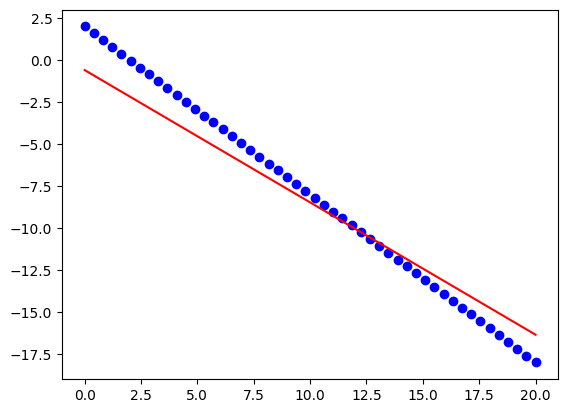

In [ ]:
plt.scatter(X,y,color='blue')
plt.plot(X,h,color='red')
plt.show

##### The following results uses alpha = 0.005, epsilon =  1e-08, and max. iterations = 5000.

In [ ]:
theta0s, theta1s, loss, theta0, theta1 , h , hypos = adagrad(X,y,0.005, 1e-08, 5000)  #dec LR inc iter

Streaming output truncated to the last 5000 lines.
  -6.20464132  -6.43142421  -6.6582071   -6.88498999  -7.11177288
  -7.33855577  -7.56533866  -7.79212156  -8.01890445  -8.24568734
  -8.47247023  -8.69925312  -8.92603601  -9.1528189   -9.37960179
  -9.60638468  -9.83316757 -10.05995046 -10.28673335 -10.51351624
 -10.74029913 -10.96708202 -11.19386491 -11.4206478  -11.64743069] 

errorvec  [-2.53506906e+00 -2.35368869e+00 -2.17230831e+00 -1.99092794e+00
 -1.80954756e+00 -1.62816719e+00 -1.44678681e+00 -1.26540644e+00
 -1.08402606e+00 -9.02645689e-01 -7.21265314e-01 -5.39884940e-01
 -3.58504565e-01 -1.77124190e-01  4.25618532e-03  1.85636560e-01
  3.67016935e-01  5.48397310e-01  7.29777685e-01  9.11158060e-01
  1.09253844e+00  1.27391881e+00  1.45529918e+00  1.63667956e+00
  1.81805993e+00  1.99944031e+00  2.18082068e+00  2.36220106e+00
  2.54358143e+00  2.72496181e+00  2.90634218e+00  3.08772256e+00
  3.26910293e+00  3.45048331e+00  3.63186368e+00  3.81324406e+00
  3.99462443e+00  4.1

In [ ]:
#very small steps, couldnt reach min in the iters

In [ ]:
r2_score(y,h)

0.7095974929894115

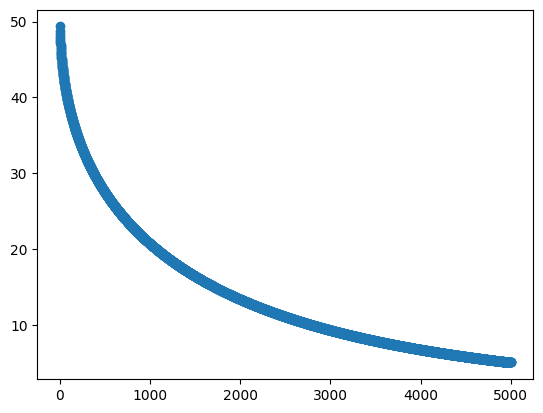

In [ ]:
epochs = list(range(len(loss)))
plt.scatter(epochs, loss)


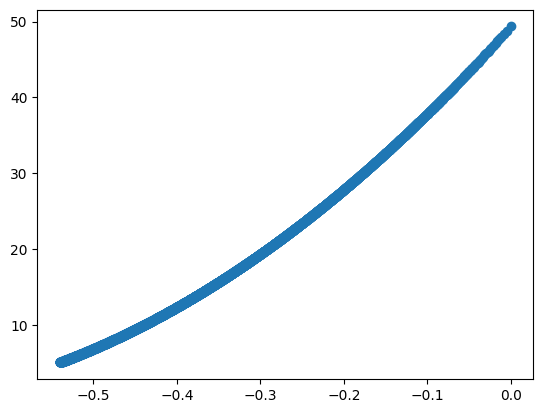

In [ ]:
plt.scatter(theta0s,loss)

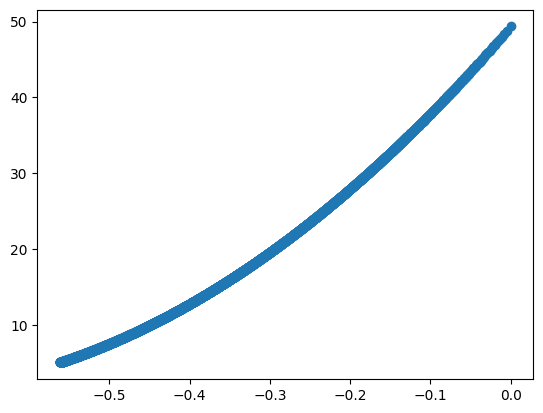

In [ ]:
plt.scatter(theta1s,loss)

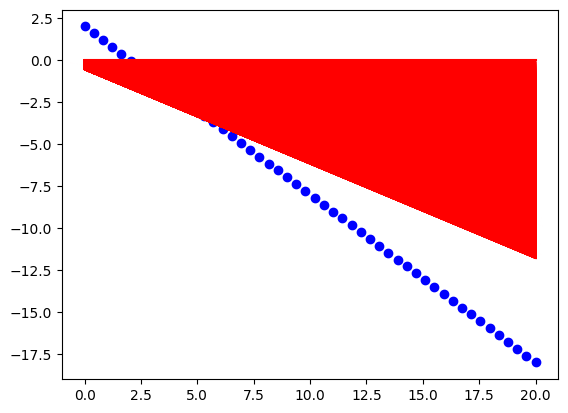

In [ ]:
plt.scatter(X,y,color='blue')
for i in range(len(hypos)):
  plt.plot(X,hypos[i],color='red')
  plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

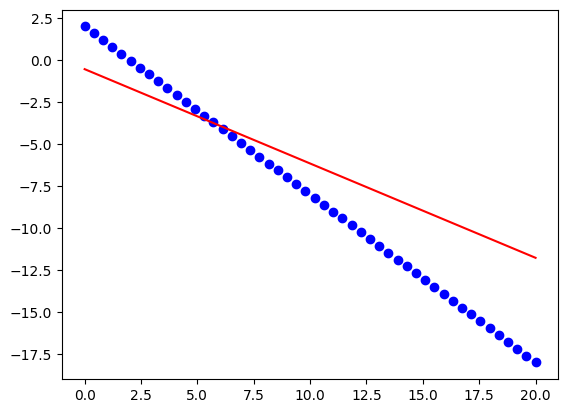

In [ ]:
plt.scatter(X,y,color='blue')
plt.plot(X,h,color='red')
plt.show

##### The following results uses alpha = 0.0005, epsilon =  1e-08, and max. iterations = 5000.

In [ ]:
theta0s, theta1s, loss, theta0, theta1 , h , hypos = adagrad(X,y,0.0005, 1e-08, 5000)  #dec LR more

Streaming output truncated to the last 5000 lines.
 16.5014382  16.88798684] 

j  43.068329477410956 

grad vector  [  7.41754501 107.03208502] 

grad vector norm  107.28880276220386 

**********iteration 2951 **********

theta 0  -0.05290578850809391 

theta 1  -0.05296480368149484 

h  [-0.05290579 -0.07452408 -0.09614236 -0.11776065 -0.13937894 -0.16099722
 -0.18261551 -0.2042338  -0.22585209 -0.24747037 -0.26908866 -0.29070695
 -0.31232524 -0.33394352 -0.35556181 -0.3771801  -0.39879838 -0.42041667
 -0.44203496 -0.46365325 -0.48527153 -0.50688982 -0.52850811 -0.55012639
 -0.57174468 -0.59336297 -0.61498126 -0.63659954 -0.65821783 -0.67983612
 -0.70145441 -0.72307269 -0.74469098 -0.76630927 -0.78792755 -0.80954584
 -0.83116413 -0.85278242 -0.8744007  -0.89601899 -0.91763728 -0.93925556
 -0.96087385 -0.98249214 -1.00411043 -1.02572871 -1.047347   -1.06896529
 -1.09058357 -1.11220186] 

errorvec  [-2.05290579 -1.66636081 -1.27981583 -0.89327085 -0.50672588 -0.1201809
  0.26636408  0.6

In [ ]:
#Effective learning rate aggressive decaying, stopped training due to cost conv check

In [ ]:
r2_score(y,h)

-1.4736441832884104

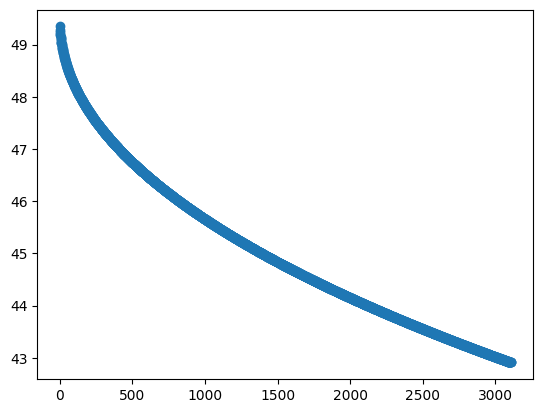

In [ ]:
epochs = list(range(len(loss)))
plt.scatter(epochs, loss)

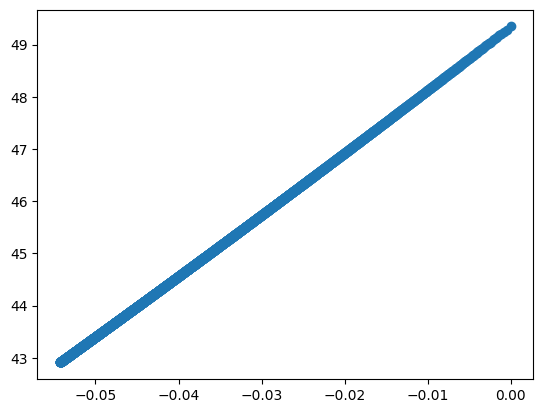

In [ ]:
plt.scatter(theta0s,loss)

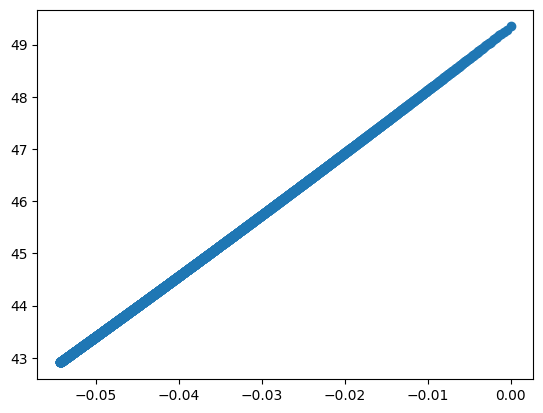

In [ ]:
plt.scatter(theta1s,loss)

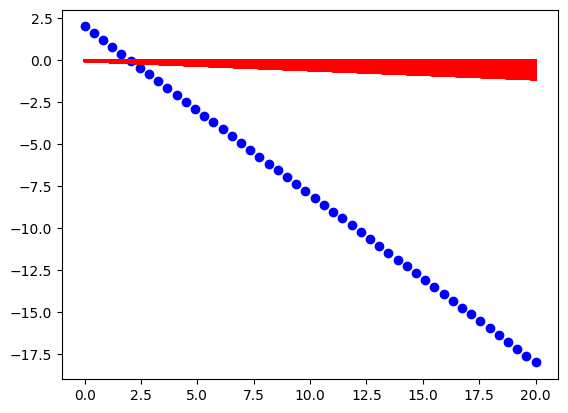

In [ ]:
plt.scatter(X,y,color='blue')
for i in range(len(hypos)):
  plt.plot(X,hypos[i],color='red')
  plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

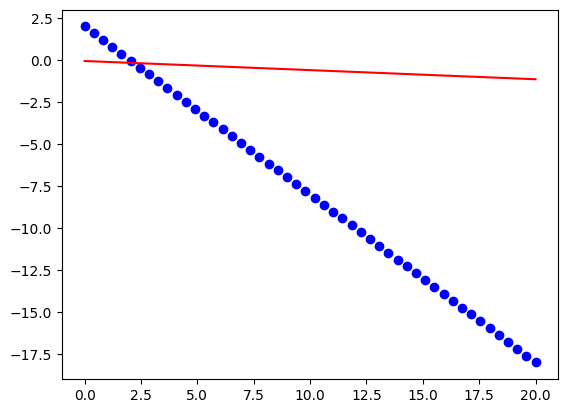

In [ ]:
plt.scatter(X,y,color='blue')
plt.plot(X,h,color='red')
plt.show

## RMSProp

In [ ]:
#my hypo is that its gonna be able to stop the aggressive decay as it gives weight to the history

In [ ]:
def rms(x , y , LR ,beta, epsilon ,iters):
  loss = []
  theta0s = []
  theta1s = []
  theta0 = 0
  theta1 = 0
  hypos = []
  prev_cost = float('inf')
  m = len(X)
  v_theta0 = 0
  v_theta1 = 0

  for i in range(iters):
    print("**********iteration",i,"**********\n")
    theta0s.append(theta0)
    theta1s.append(theta1)
    print("theta 0 ", theta0,"\n")
    print("theta 1 ", theta1,"\n")

    h = theta0 + theta1*x
    hypos.append(h)
    print("h ", h,"\n")
    error_vec = h-y
    print("errorvec " ,error_vec,"\n")
    j = np.mean(error_vec**2) / 2
    loss.append(j)
    print("j ",j,"\n")
    d_theta0 = np.sum(error_vec) / m
    d_theta1 = np.sum(error_vec*x)  / m
    gradvec = np.array([d_theta0,d_theta1])
    print("grad vector ", gradvec,"\n")
    gradvecNorm = np.linalg.norm(gradvec)
    print("grad vector norm ", gradvecNorm,"\n")


    if gradvecNorm < 0.001 or abs(prev_cost - j) < 0.001:
      break
    else:
      prev_cost = j
      #update v
      v_theta0 = beta*v_theta0 + (1-beta)*(d_theta0 **2)
      v_theta1 = beta*v_theta1 + (1-beta)*(d_theta1 **2)
      theta0 = theta0 - (LR/ (np.sqrt(v_theta0)+epsilon) )* d_theta0   #update theta
      theta1 = theta1 - (LR/ (np.sqrt(v_theta1)+epsilon) )* d_theta1



  return theta0s, theta1s, loss, theta0, theta1 , h , hypos

##### The following results uses alpha = 0.05, beta = 0.9, epsilon =  1e-08, and max. iterations = 500.

In [ ]:
theta0s, theta1s, loss, theta0, theta1 , h , hypos = rms(X,y,0.05,0.9,1e-08,500)

**********iteration 0 **********

theta 0  0 

theta 1  0 

h  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.] 

errorvec  [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ] 

j  49.34693877551021 

grad vector  [  8.         114.69387755] 

grad vector norm  114.97254258164628 

**********iteration 1 **********

theta 0  -0.158113882

In [ ]:
r2_score(y,h)

0.9993602095484933

r2 score =  0.9993328514667263


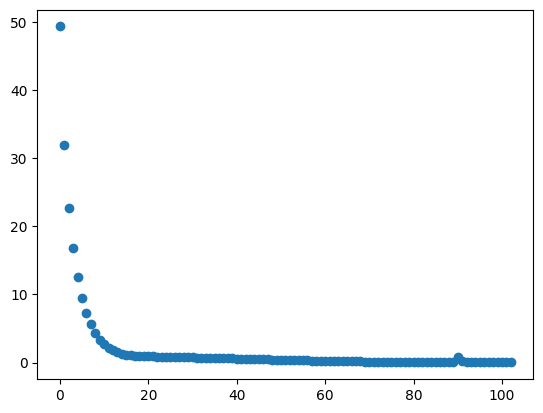

In [ ]:
epochs = list(range(len(loss)))
plt.scatter(epochs, loss)

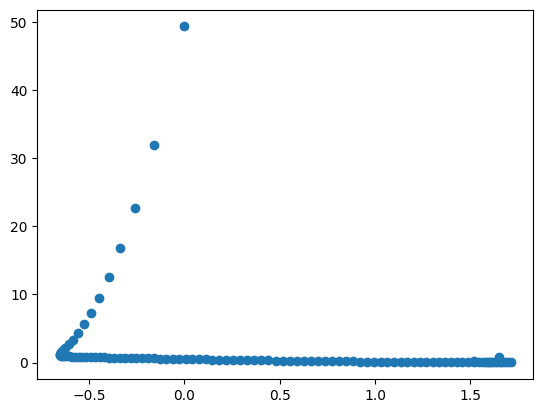

In [ ]:
plt.scatter(theta0s,loss)

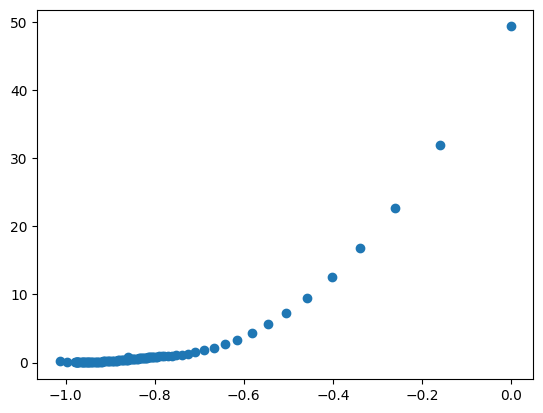

In [ ]:
plt.scatter(theta1s,loss)

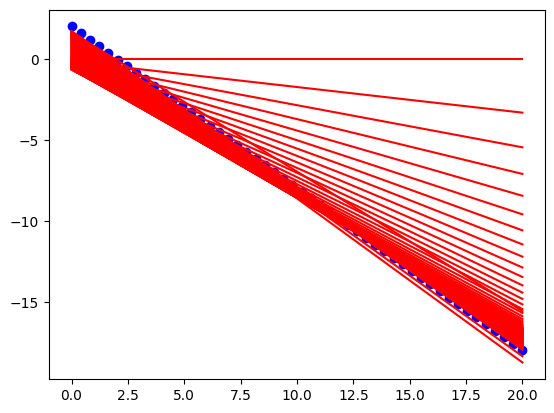

In [ ]:
plt.scatter(X,y,color='blue')
for i in range(len(hypos)):
  plt.plot(X,hypos[i],color='red')
  plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

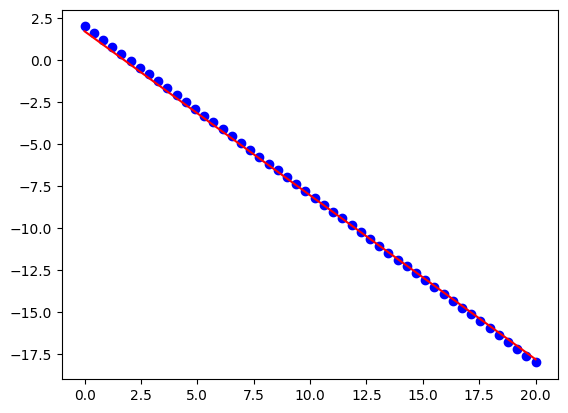

In [ ]:
plt.scatter(X,y,color='blue')
plt.plot(X,h,color='red')
plt.show

##### The following results uses alpha = 0.005, beta = 0.9, epsilon =  1e-08, and max. iterations = 5000.

In [ ]:
theta0s, theta1s, loss, theta0, theta1 , h , hypos = rms(X,y,0.005,0.9,1e-08,5000)  #dec alpha

Streaming output truncated to the last 5000 lines.
  0.75280413  0.80057782] 

j  0.3060517131604598 

grad vector  [-0.36987741  0.36198895] 

grad vector norm  0.5175377226569886 

**********iteration 392 **********

theta 0  0.46422475286525244 

theta 1  -0.8882912637831849 

h  [  0.46422475   0.10165689  -0.26091097  -0.62347884  -0.9860467
  -1.34861456  -1.71118242  -2.07375029  -2.43631815  -2.79888601
  -3.16145387  -3.52402174  -3.8865896   -4.24915746  -4.61172533
  -4.97429319  -5.33686105  -5.69942891  -6.06199678  -6.42456464
  -6.7871325   -7.14970037  -7.51226823  -7.87483609  -8.23740395
  -8.59997182  -8.96253968  -9.32510754  -9.6876754  -10.05024327
 -10.41281113 -10.77537899 -11.13794686 -11.50051472 -11.86308258
 -12.22565044 -12.58821831 -12.95078617 -13.31335403 -13.6759219
 -14.03848976 -14.40105762 -14.76362548 -15.12619335 -15.48876121
 -15.85132907 -16.21389693 -16.5764648  -16.93903266 -17.30160052] 

errorvec  [-1.53577525 -1.49017984 -1.44458444 -1.39898

In [ ]:
r2_score(y,h)

0.9948527107478715

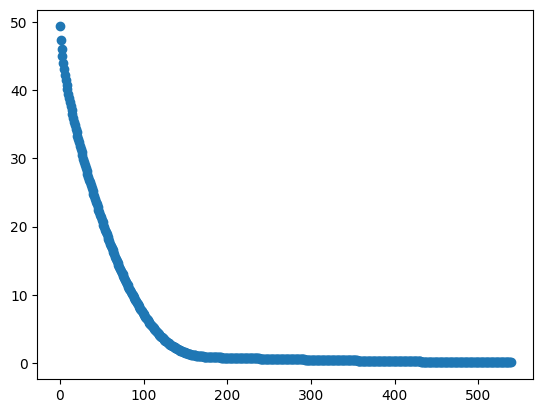

In [ ]:
epochs = list(range(len(loss)))
plt.scatter(epochs, loss)

In [ ]:
#more iters

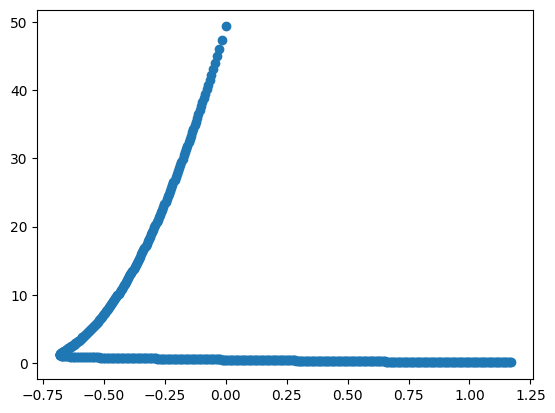

In [ ]:
plt.scatter(theta0s,loss)

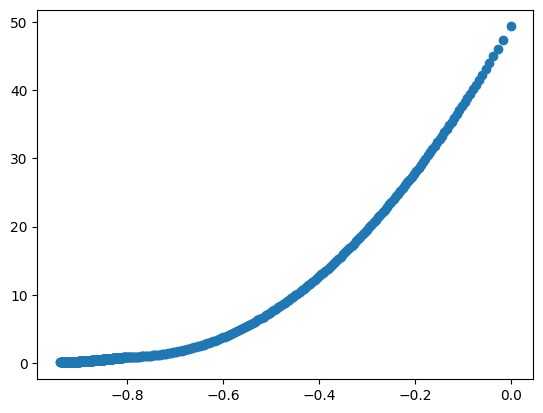

In [ ]:
plt.scatter(theta1s,loss)

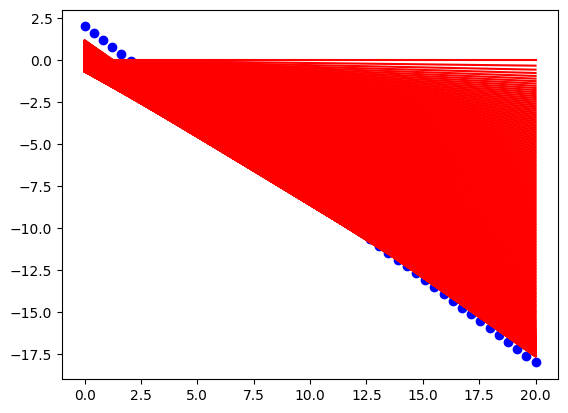

In [ ]:
plt.scatter(X,y,color='blue')
for i in range(len(hypos)):
  plt.plot(X,hypos[i],color='red')
  plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

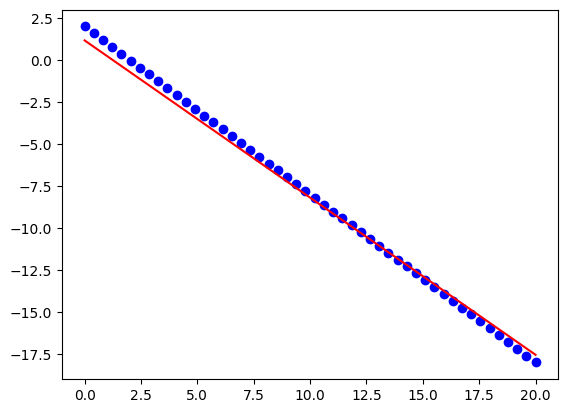

In [ ]:
plt.scatter(X,y,color='blue')
plt.plot(X,h,color='red')
plt.show

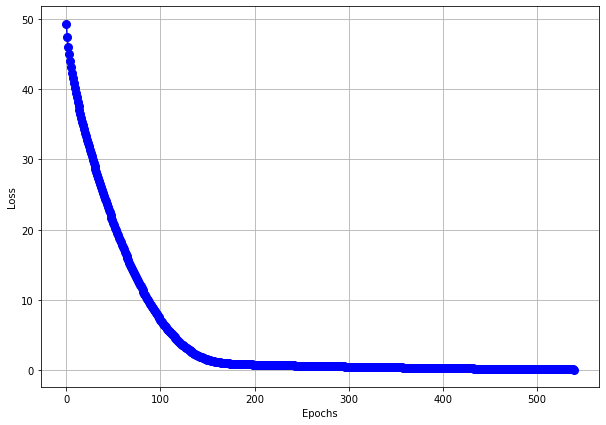

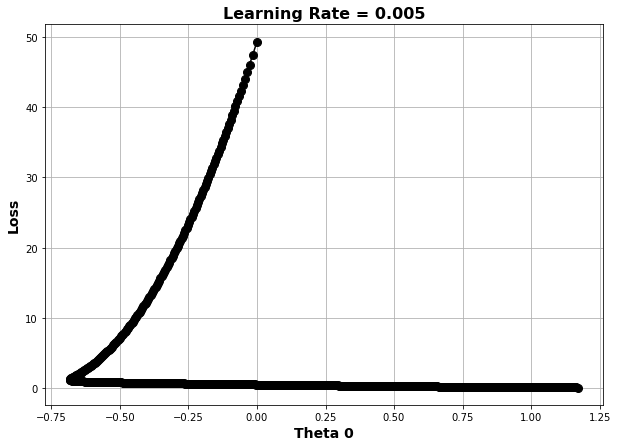

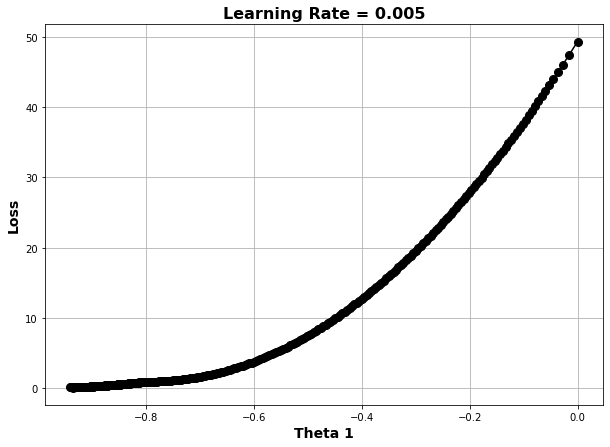

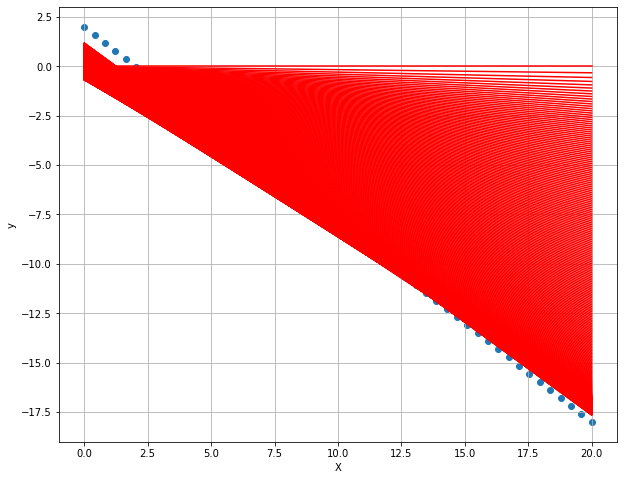

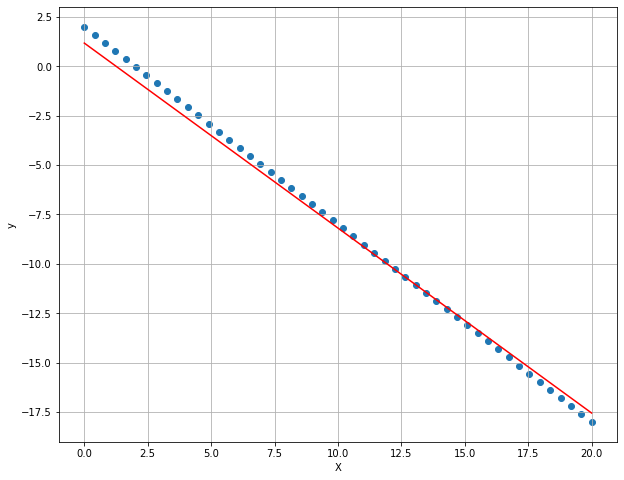

##### The following results uses alpha = 0.0005, beta = 0.9, epsilon =  1e-08, and max. iterations = 5000.

In [ ]:
theta0s, theta1s, loss, theta0, theta1 , h , hypos = rms(X,y,0.0005,0.9,1e-08,5000)  #dec alpha more

Streaming output truncated to the last 5000 lines.
  -2.18973601  -2.48496744  -2.78019888  -3.07543031  -3.37066175
  -3.66589319  -3.96112462  -4.25635606  -4.5515875   -4.84681893
  -5.14205037  -5.4372818   -5.73251324  -6.02774468  -6.32297611
  -6.61820755  -6.91343899  -7.20867042  -7.50390186  -7.7991333
  -8.09436473  -8.38959617  -8.6848276   -8.98005904  -9.27529048
  -9.57052191  -9.86575335 -10.16098479 -10.45621622 -10.75144766
 -11.04667909 -11.34191053 -11.63714197 -11.9323734  -12.22760484
 -12.52283628 -12.81806771 -13.11329915 -13.40853059 -13.70376202
 -13.99899346 -14.29422489 -14.58945633 -14.88468777 -15.1799192 ] 

errorvec  [-2.71357882 -2.60064699 -2.48771517 -2.37478334 -2.26185151 -2.14891968
 -2.03598785 -1.92305602 -1.81012419 -1.69719236 -1.58426053 -1.4713287
 -1.35839688 -1.24546505 -1.13253322 -1.01960139 -0.90666956 -0.79373773
 -0.6808059  -0.56787407 -0.45494224 -0.34201042 -0.22907859 -0.11614676
 -0.00321493  0.1097169   0.22264873  0.33558056  0.

In [ ]:
r2_score(y,h)

0.9476184845511563

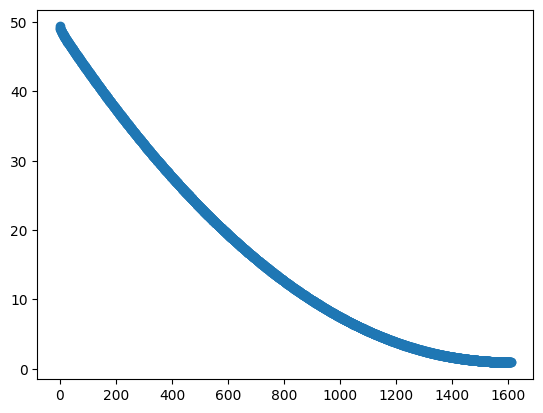

In [ ]:
epochs = list(range(len(loss)))
plt.scatter(epochs, loss)

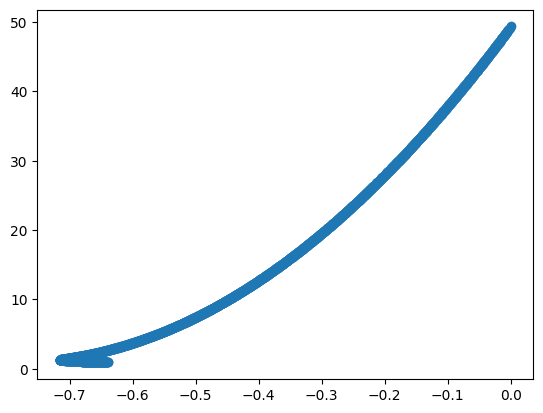

In [ ]:
plt.scatter(theta0s,loss)

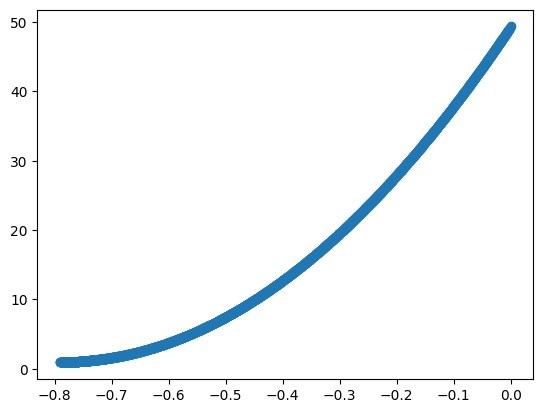

In [ ]:

plt.scatter(theta1s,loss)

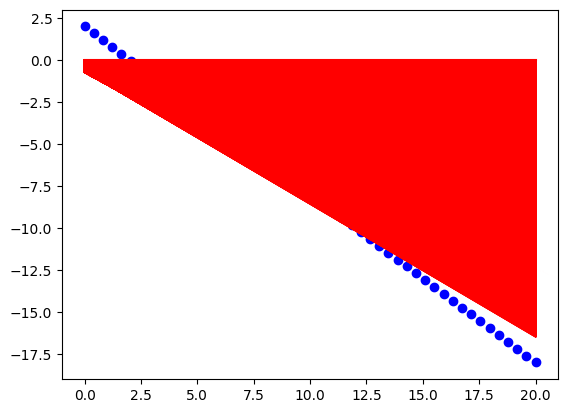

In [ ]:
plt.scatter(X,y,color='blue')
for i in range(len(hypos)):
  plt.plot(X,hypos[i],color='red')
  plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

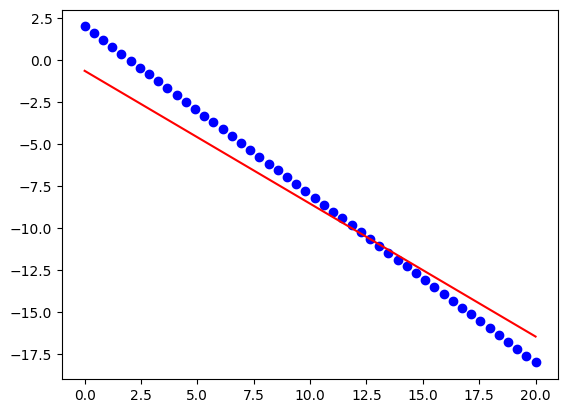

In [ ]:
plt.scatter(X,y,color='blue')
plt.plot(X,h,color='red')
plt.show

In [ ]:
#compared to the ADAGRAD, it didnt stop because I gave more weight to the history not the gradient


## Adam

In [ ]:
def adam(x , y , LR ,betam, betav, epsilon ,iters):
  loss = []
  theta0s = []
  theta1s = []
  theta0 = 0
  theta1 = 0
  hypos = []
  prev_cost = float('inf')
  m = len(X)
  m_theta0 = 0
  m_theta1 = 0
  v_theta0 = 0
  v_theta1 = 0

  for i in range(1,iters+1):
    print("**********iteration",i,"**********\n")
    theta0s.append(theta0)
    theta1s.append(theta1)
    print("theta 0 ", theta0,"\n")
    print("theta 1 ", theta1,"\n")

    h = theta0 + theta1*x
    hypos.append(h)
    print("h ", h,"\n")
    error_vec = h-y
    print("errorvec " ,error_vec,"\n")
    j = np.mean(error_vec**2) / 2
    loss.append(j)
    print("j ",j,"\n")
    d_theta0 = np.sum(error_vec) / m
    d_theta1 = np.sum(error_vec*x)  / m
    gradvec = np.array([d_theta0,d_theta1])
    print("grad vector ", gradvec,"\n")
    gradvecNorm = np.linalg.norm(gradvec)
    print("grad vector norm ", gradvecNorm,"\n")



    if gradvecNorm < 0.001 or abs(prev_cost - j) < 0.001:
      break
    else:
      prev_cost = j
      #update m
      m_theta0 = betam*m_theta0 + ( (1-betam)*d_theta0 )
      m_theta1 = betam*m_theta1 + ( (1-betam)*d_theta1 )

      #update v
      v_theta0 = betav*v_theta0 + (1-betav)*(d_theta0 **2)
      v_theta1 = betav*v_theta1 + (1-betav)*(d_theta1 **2)

      #get m hats
      m_theta0hat = m_theta0/(1-(betam**i))
      m_theta1hat = m_theta1/(1-(betam**i))
      #get v hats
      v_theta0hat = v_theta0/(1-(betav**i))
      v_theta1hat = v_theta1/(1-(betav**i))

      theta0 = theta0 - (LR/ (np.sqrt(v_theta0hat)+epsilon) )* m_theta0hat
      theta1 = theta1 - (LR/ (np.sqrt(v_theta1hat)+epsilon) )* m_theta1hat



  return theta0s, theta1s, loss, theta0, theta1 , h , hypos

##### The following results uses alpha = 0.05, beta1 = 0.2, beta2 = 0.7, epsilon =  1e-08, and max. iterations = 500.

In [ ]:
theta0s, theta1s, loss, theta0, theta1 , h , hypos = adam(X , y , 0.05 ,0.2, 0.7, 1e-08 ,500)

**********iteration 1 **********

theta 0  0 

theta 1  0 

h  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.] 

errorvec  [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ] 

j  49.34693877551021 

grad vector  [  8.         114.69387755] 

grad vector norm  114.97254258164628 

**********iteration 2 **********

theta 0  -0.049999999

In [ ]:
from sklearn.metrics import r2_score
r2_score(y,h)

0.9989675218213927

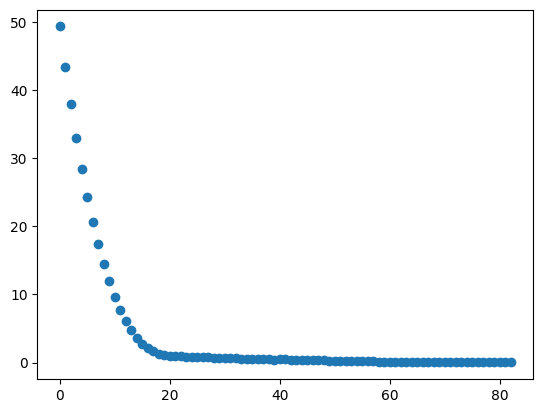

In [ ]:
epochs = list(range(len(loss)))
plt.scatter(epochs, loss)

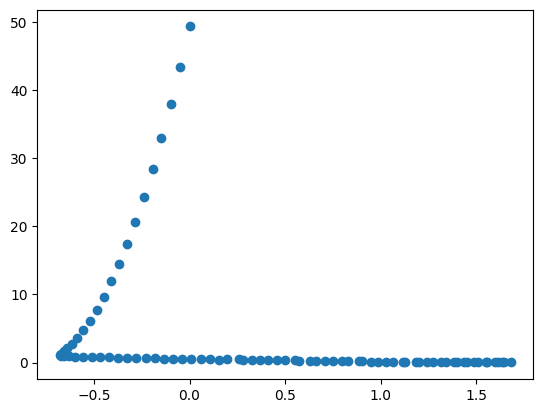

In [ ]:
plt.scatter(theta0s,loss)

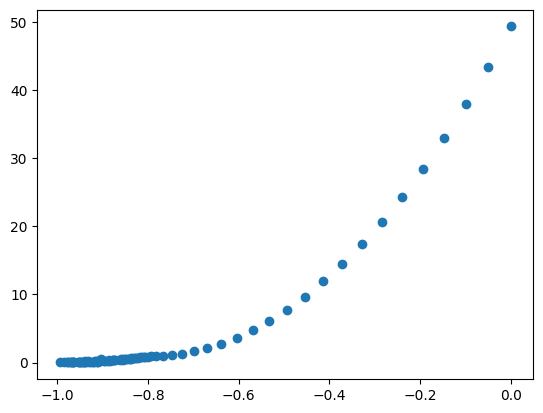

In [ ]:
plt.scatter(theta1s,loss)

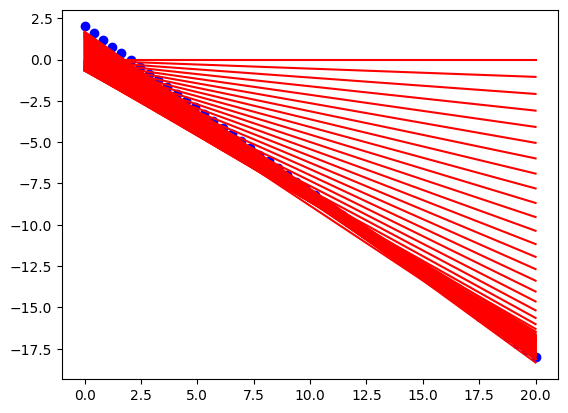

In [ ]:
plt.scatter(X,y,color='blue')
for i in range(len(hypos)):
  plt.plot(X,hypos[i],color='red')
  plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

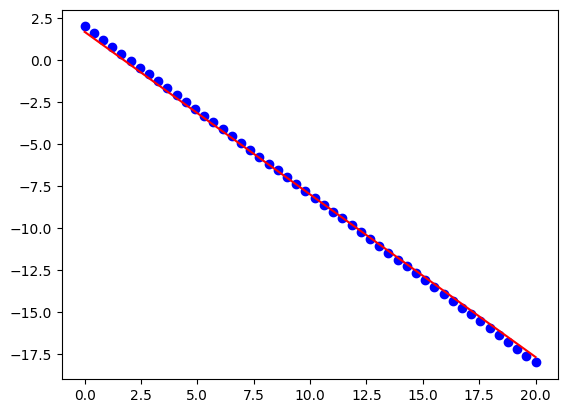

In [ ]:
plt.scatter(X,y,color='blue')
plt.plot(X,h,color='red')
plt.show

##### The following results uses alpha = 0.005, beta1 = 0.5, beta2 = 0.8, epsilon =  1e-08, and max. iterations = 500.

In [ ]:
theta0s, theta1s, loss, theta0, theta1 , h , hypos = adam(X , y , 0.005 ,0.5, 0.8, 1e-08 ,500)

Streaming output truncated to the last 5000 lines.
 -0.16604994 -0.1138272  -0.06160446 -0.00938171  0.04284103  0.09506377
  0.14728651  0.19950926  0.251732    0.30395474  0.35617748  0.40840022
  0.46062297  0.51284571  0.56506845  0.61729119  0.66951393  0.72173668
  0.77395942  0.82618216] 

j  0.3867003633428302 

grad vector  [-0.45327502 -0.09381713] 

grad vector norm  0.46288216581554426 

**********iteration 352 **********

theta 0  0.27224448108811133 

theta 1  -0.8707169945687471 

h  [  0.27224448  -0.08315021  -0.4385449   -0.79393959  -1.14933429
  -1.50472898  -1.86012367  -2.21551836  -2.57091305  -2.92630774
  -3.28170244  -3.63709713  -3.99249182  -4.34788651  -4.7032812
  -5.05867589  -5.41407059  -5.76946528  -6.12485997  -6.48025466
  -6.83564935  -7.19104404  -7.54643874  -7.90183343  -8.25722812
  -8.61262281  -8.9680175   -9.32341219  -9.67880689 -10.03420158
 -10.38959627 -10.74499096 -11.10038565 -11.45578034 -11.81117504
 -12.16656973 -12.52196442 -12.8773

In [ ]:
r2_score(y,h)

0.992630779461015

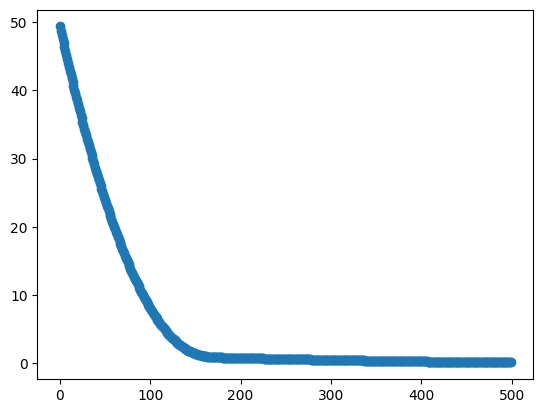

In [ ]:
epochs = list(range(len(loss)))
plt.scatter(epochs, loss)

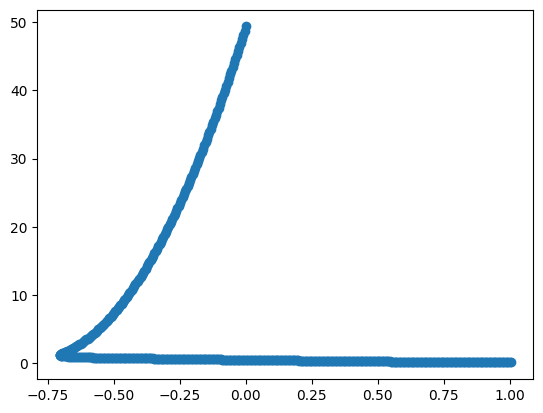

In [ ]:
plt.scatter(theta0s,loss)

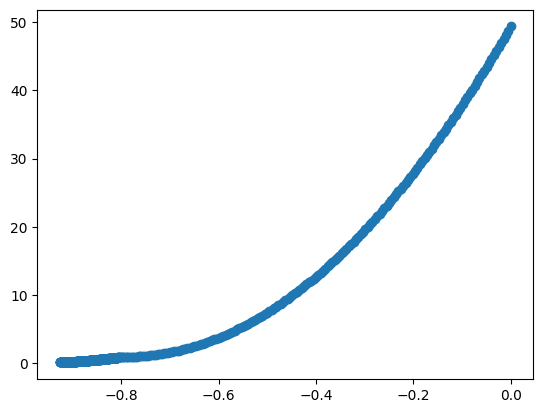

In [ ]:
plt.scatter(theta1s,loss)

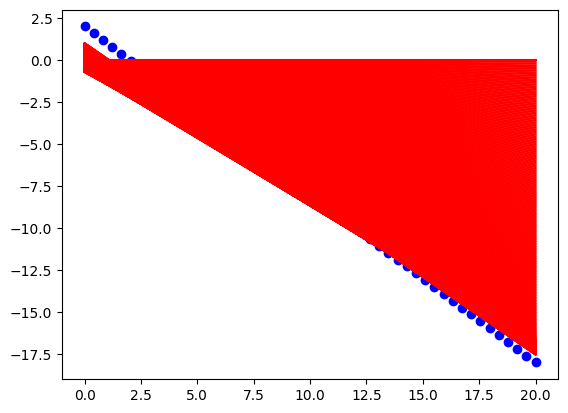

In [ ]:
plt.scatter(X,y,color='blue')
for i in range(len(hypos)):
  plt.plot(X,hypos[i],color='red')
  plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

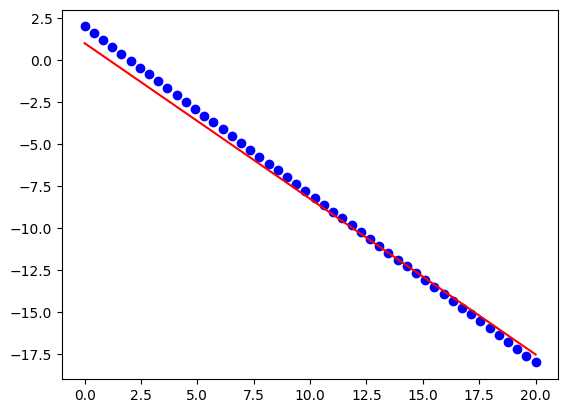

In [ ]:
plt.scatter(X,y,color='blue')
plt.plot(X,h,color='red')
plt.show

##### The following results uses alpha = 0.0005, beta1 = 0.8, beta2 = 0.8, epsilon =  1e-08, and max. iterations = 5000.

In [ ]:
theta0s, theta1s, loss, theta0, theta1 , h , hypos = adam(X , y , 0.0005 ,0.8, 0.5, 1e-08 ,5000)

Streaming output truncated to the last 5000 lines.
 -13.82962778 -14.12103263 -14.41243748 -14.70384233 -14.99524718] 

errorvec  [-2.7164095  -2.59965109 -2.48289267 -2.36613426 -2.24937584 -2.13261743
 -2.01585901 -1.8991006  -1.78234218 -1.66558377 -1.54882535 -1.43206694
 -1.31530853 -1.19855011 -1.0817917  -0.96503328 -0.84827487 -0.73151645
 -0.61475804 -0.49799962 -0.38124121 -0.26448279 -0.14772438 -0.03096596
  0.08579245  0.20255086  0.31930928  0.43606769  0.55282611  0.66958452
  0.78634294  0.90310135  1.01985977  1.13661818  1.2533766   1.37013501
  1.48689343  1.60365184  1.72041025  1.83716867  1.95392708  2.0706855
  2.18744391  2.30420233  2.42096074  2.53771916  2.65447757  2.77123599
  2.8879944   3.00475282] 

j  1.4298796470637236 

grad vector  [ 0.14417166 11.36618182] 

grad vector norm  11.367096136661846 

**********iteration 1423 **********

theta 0  -0.7169651745632295 

theta 1  -0.7144515738404684 

h  [ -0.71696517  -1.00857806  -1.30019095  -1.59180384 

In [ ]:
r2_score(y,h)

0.9463425756287315

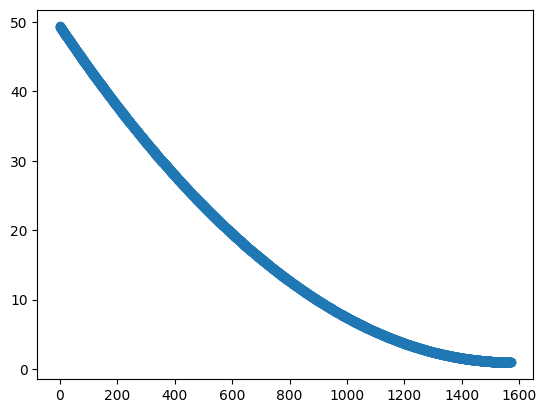

In [ ]:
epochs = list(range(len(loss)))
plt.scatter(epochs, loss)

In [ ]:
plt.scatter(theta0s,loss)

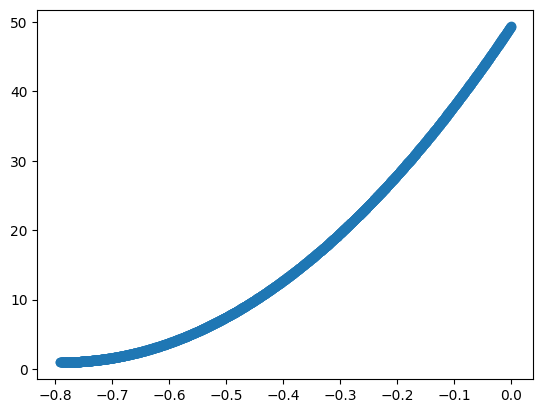

In [ ]:
plt.scatter(theta1s,loss)

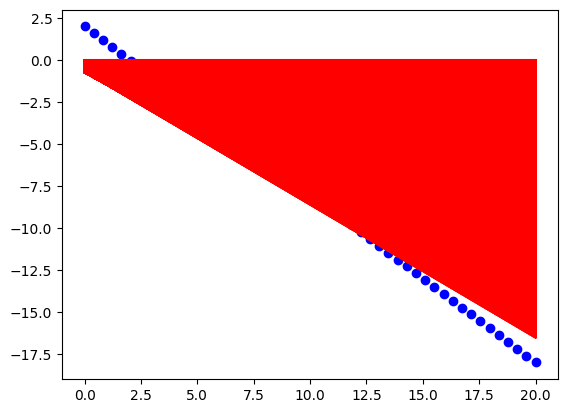

In [ ]:
plt.scatter(X,y,color='blue')
for i in range(len(hypos)):
  plt.plot(X,hypos[i],color='red')
  plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

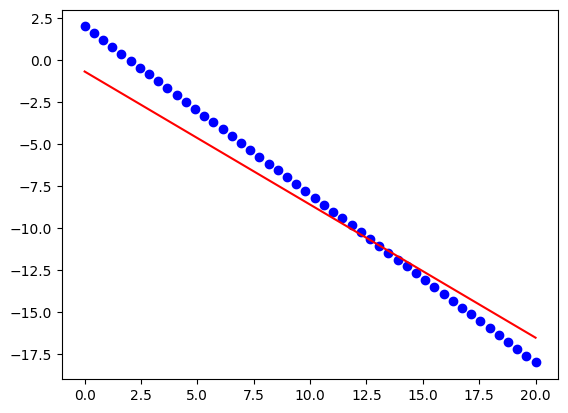

In [ ]:
plt.scatter(X,y,color='blue')
plt.plot(X,h,color='red')
plt.show

##### The following results uses alpha = 0.001, beta1 = 0.9, beta2 = 0.99, epsilon =  1e-08, and max. iterations = 5000.

In [ ]:
theta0s, theta1s, loss, theta0, theta1 , h , hypos = adam(X , y , 0.001 ,0.9, 0.99, 1e-08 ,5000)

Streaming output truncated to the last 5000 lines.
  1.22687795  1.33507697  1.443276    1.55147502  1.65967405  1.76787307
  1.8760721   1.98427112  2.09247015  2.20066917  2.3088682   2.41706722
  2.52526625  2.63346527] 

j  1.2191459714235544 

grad vector  [-0.01741085  9.02280869] 

grad vector norm  9.022825489373279 

**********iteration 915 **********

theta 0  -0.6683168765759968 

theta 1  -0.7353986200872092 

h  [ -0.66831688  -0.96847958  -1.26864228  -1.56880498  -1.86896768
  -2.16913039  -2.46929309  -2.76945579  -3.06961849  -3.3697812
  -3.6699439   -3.9701066   -4.2702693   -4.570432    -4.87059471
  -5.17075741  -5.47092011  -5.77108281  -6.07124551  -6.37140822
  -6.67157092  -6.97173362  -7.27189632  -7.57205902  -7.87222173
  -8.17238443  -8.47254713  -8.77270983  -9.07287253  -9.37303524
  -9.67319794  -9.97336064 -10.27352334 -10.57368605 -10.87384875
 -11.17401145 -11.47417415 -11.77433685 -12.07449956 -12.37466226
 -12.67482496 -12.97498766 -13.27515036 -13.

In [ ]:
r2_score(y,h)

0.9485667803280174

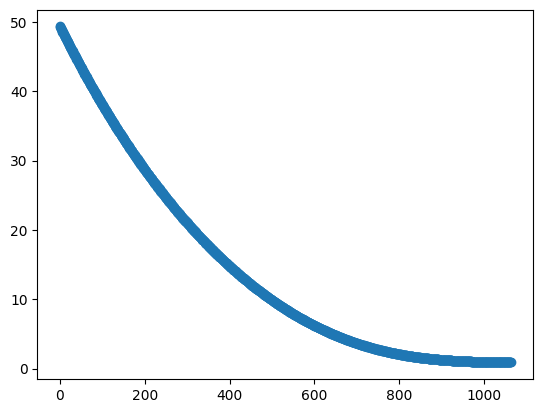

In [ ]:
epochs = list(range(len(loss)))
plt.scatter(epochs, loss)

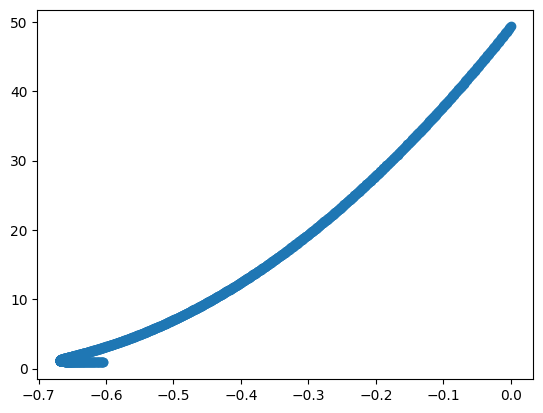

In [ ]:
plt.scatter(theta0s,loss)

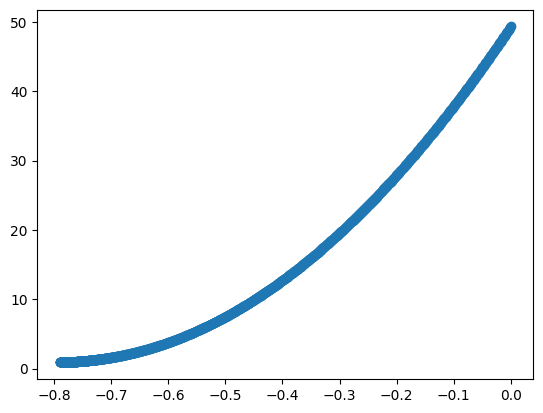

In [ ]:
plt.scatter(theta1s,loss)

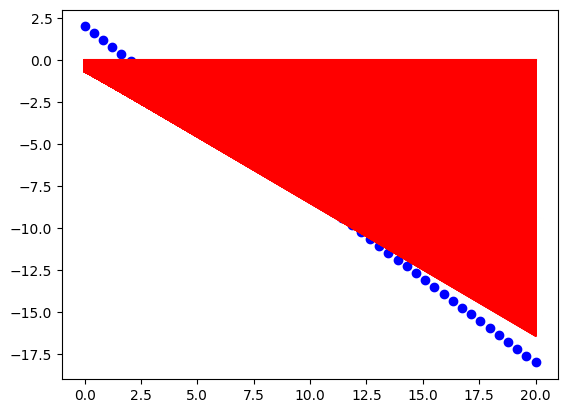

In [ ]:
plt.scatter(X,y,color='blue')
for i in range(len(hypos)):
  plt.plot(X,hypos[i],color='red')
  plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

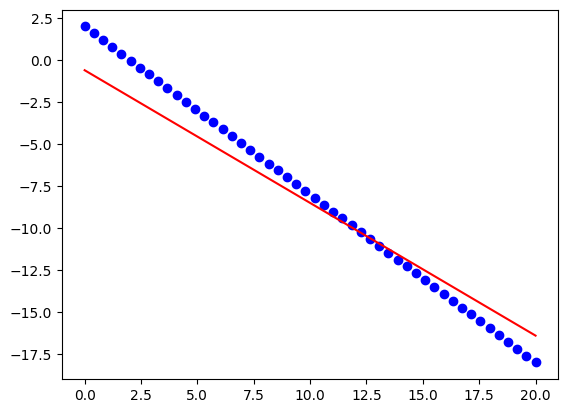

In [ ]:
plt.scatter(X,y,color='blue')
plt.plot(X,h,color='red')
plt.show

##### The following results uses alpha = 0.001, beta1 = 0.9, beta2 = 0.5, epsilon =  1e-08, and max. iterations = 5000.

In [ ]:
theta0s, theta1s, loss, theta0, theta1 , h , hypos = adam(X , y , 0.001 ,0.9, 0.5, 1e-08 ,5000)

Streaming output truncated to the last 5000 lines.
  2.01680386  2.17150015  2.32619644  2.48089273  2.63558901  2.7902853
  2.94498159  3.09967788  3.25437417  3.40907045  3.56376674  3.71846303
  3.87315932  4.0278556   4.18255189  4.33724818  4.49194447  4.64664075
  4.80133704  4.95603333] 

j  3.1715572872762743 

grad vector  [ 1.16597428 24.80892727] 

grad vector norm  24.836311487506684 

**********iteration 611 **********

theta 0  -0.6251629659315864 

theta 1  -0.6220426221860447 

h  [ -0.62516297  -0.87905791  -1.13295286  -1.38684781  -1.64074276
  -1.89463771  -2.14853265  -2.4024276   -2.65632255  -2.9102175
  -3.16411244  -3.41800739  -3.67190234  -3.92579729  -4.17969224
  -4.43358718  -4.68748213  -4.94137708  -5.19527203  -5.44916697
  -5.70306192  -5.95695687  -6.21085182  -6.46474677  -6.71864171
  -6.97253666  -7.22643161  -7.48032656  -7.73422151  -7.98811645
  -8.2420114   -8.49590635  -8.7498013   -9.00369624  -9.25759119
  -9.51148614  -9.76538109 -10.019276

In [ ]:
r2_score(y,h)

0.944245878919177

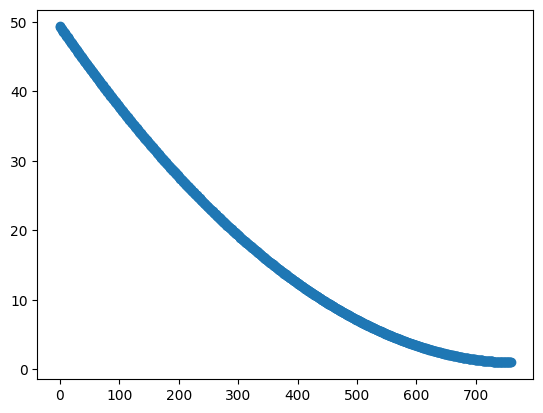

In [ ]:
epochs = list(range(len(loss)))
plt.scatter(epochs, loss)

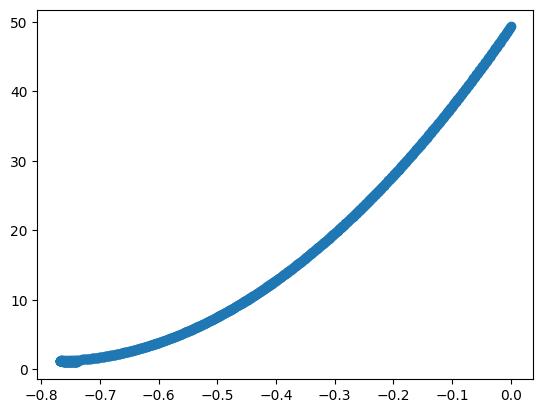

In [ ]:
plt.scatter(theta0s,loss)

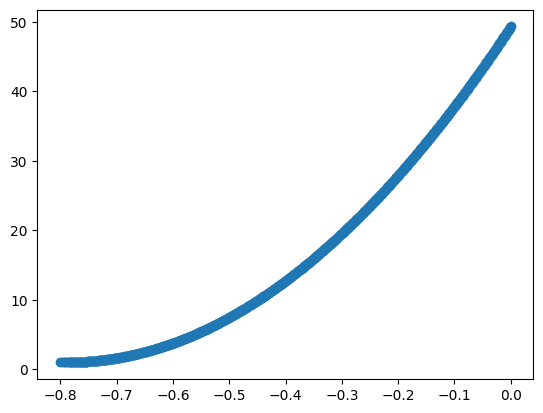

In [ ]:
plt.scatter(theta1s,loss)

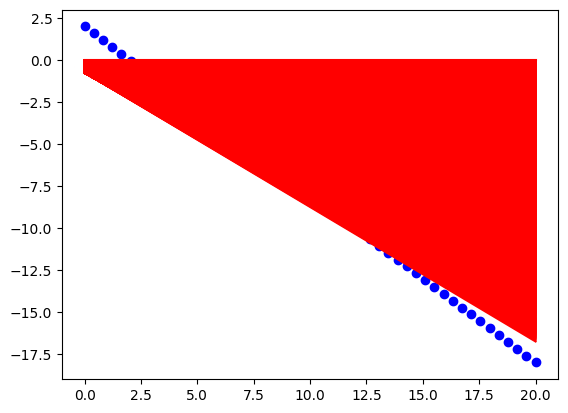

In [ ]:
plt.scatter(X,y,color='blue')
for i in range(len(hypos)):
  plt.plot(X,hypos[i],color='red')
  plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

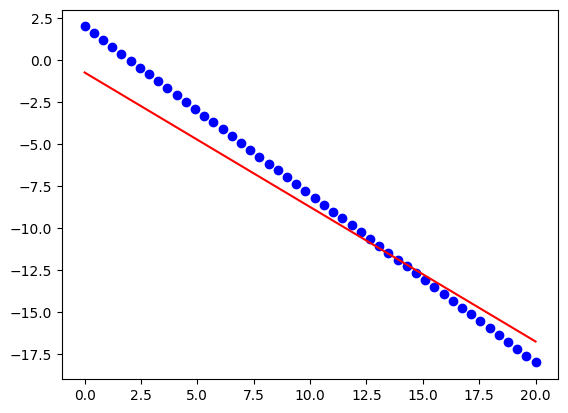

In [ ]:
plt.scatter(X,y,color='blue')
plt.plot(X,h,color='red')
plt.show

##### The following results uses alpha = 0.001, beta1 = 0.5, beta2 = 0.99, epsilon =  1e-08, and max. iterations = 5000.

In [ ]:
theta0s, theta1s, loss, theta0, theta1 , h , hypos = adam(X , y , 0.001 ,0.5, 0.99, 1e-08 ,5000)

Streaming output truncated to the last 5000 lines.
 -14.25309494 -14.55510919 -14.85712343 -15.15913768 -15.46115192] 

errorvec  [-2.6624539  -2.55630488 -2.45015586 -2.34400684 -2.23785782 -2.1317088
 -2.02555978 -1.91941076 -1.81326174 -1.70711272 -1.6009637  -1.49481468
 -1.38866566 -1.28251664 -1.17636762 -1.0702186  -0.96406958 -0.85792056
 -0.75177154 -0.64562252 -0.5394735  -0.43332448 -0.32717546 -0.22102644
 -0.11487742 -0.0087284   0.09742062  0.20356964  0.30971866  0.41586768
  0.5220167   0.62816572  0.73431474  0.84046376  0.94661278  1.0527618
  1.15891082  1.26505984  1.37120886  1.47735788  1.5835069   1.68965592
  1.79580494  1.90195396  2.00810298  2.114252    2.22040102  2.32655004
  2.43269906  2.53884808] 

j  1.1751501525738817 

grad vector  [-0.06180291  8.40463758] 

grad vector norm  8.404864805539418 

**********iteration 942 **********

theta 0  -0.6623881914072723 

theta 1  -0.7403888388165007 

h  [ -0.66238819  -0.96458772  -1.26678724  -1.56898677  -1

In [ ]:
r2_score(y,h)

0.949344733641701

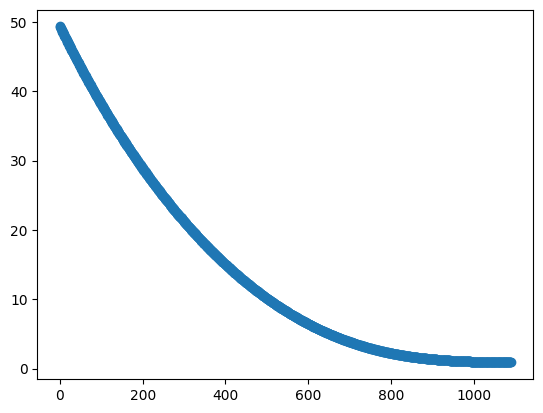

In [ ]:
epochs = list(range(len(loss)))
plt.scatter(epochs, loss)

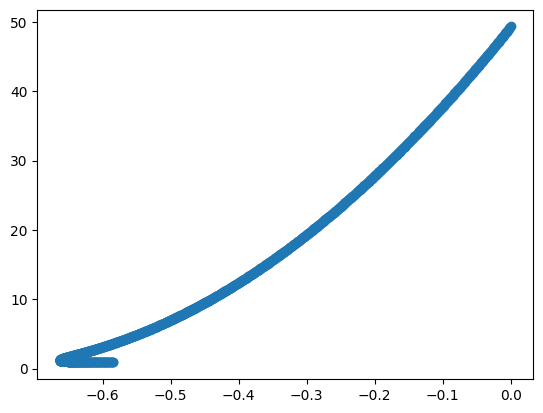

In [ ]:
plt.scatter(theta0s,loss)

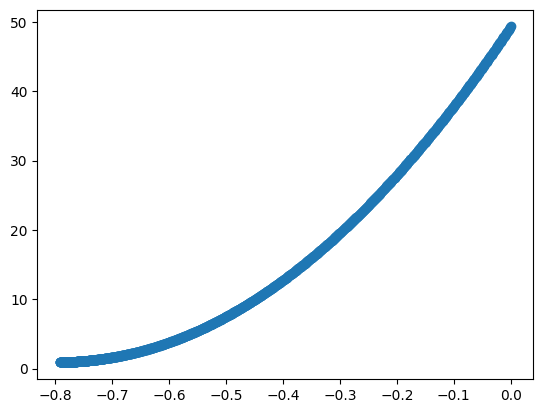

In [ ]:
plt.scatter(theta1s,loss)

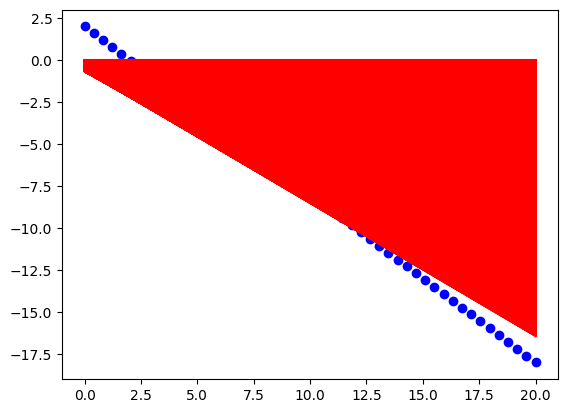

In [ ]:
plt.scatter(X,y,color='blue')
for i in range(len(hypos)):
  plt.plot(X,hypos[i],color='red')
  plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

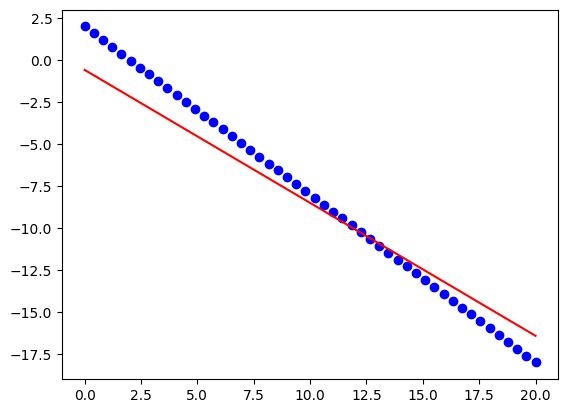

In [ ]:
plt.scatter(X,y,color='blue')
plt.plot(X,h,color='red')
plt.show

##### The following results uses alpha = 0.001, beta1 = 0.5, beta2 = 0.5, epsilon =  1e-08, and max. iterations = 5000.

In [ ]:
theta0s, theta1s, loss, theta0, theta1 , h , hypos = adam(X , y , 0.001 ,0.5, 0.5, 1e-08 ,5000)

Streaming output truncated to the last 5000 lines.
 -12.60802635 -12.8737383  -13.13945026 -13.40516221 -13.67087416] 

errorvec  [-2.65098852 -2.50853721 -2.3660859  -2.22363458 -2.08118327 -1.93873196
 -1.79628064 -1.65382933 -1.51137801 -1.3689267  -1.22647539 -1.08402407
 -0.94157276 -0.79912145 -0.65667013 -0.51421882 -0.37176751 -0.22931619
 -0.08686488  0.05558643  0.19803775  0.34048906  0.48294037  0.62539169
  0.767843    0.91029432  1.05274563  1.19519694  1.33764826  1.48009957
  1.62255088  1.7650022   1.90745351  2.04990482  2.19235614  2.33480745
  2.47725876  2.61971008  2.76216139  2.90461271  3.04706402  3.18951533
  3.33196665  3.47441796  3.61686927  3.75932059  3.9017719   4.04422321
  4.18667453  4.32912584] 

j  2.464961834022499 

grad vector  [ 0.83906866 20.49904824] 

grad vector norm  20.516213463578566 

**********iteration 653 **********

theta 0  -0.6519883556995728 

theta 1  -0.6519942327013966 

h  [ -0.65198836  -0.91810845  -1.18422855  -1.45034864  

In [ ]:
r2_score(y,h)

0.9475845101116701

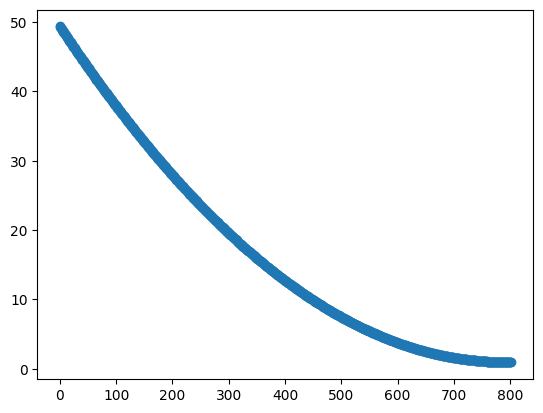

In [ ]:
epochs = list(range(len(loss)))
plt.scatter(epochs, loss)

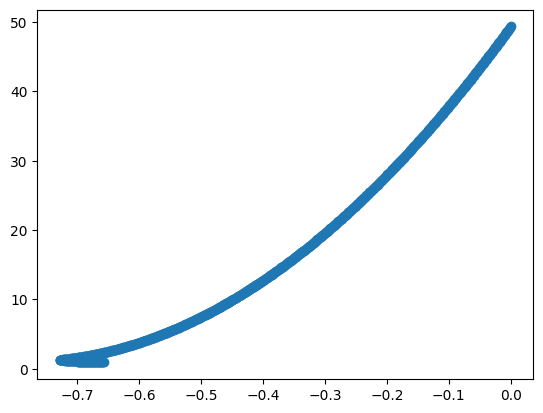

In [ ]:
plt.scatter(theta0s,loss)

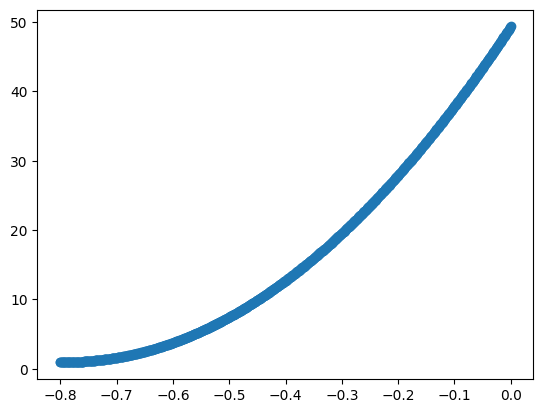

In [ ]:
plt.scatter(theta1s,loss)

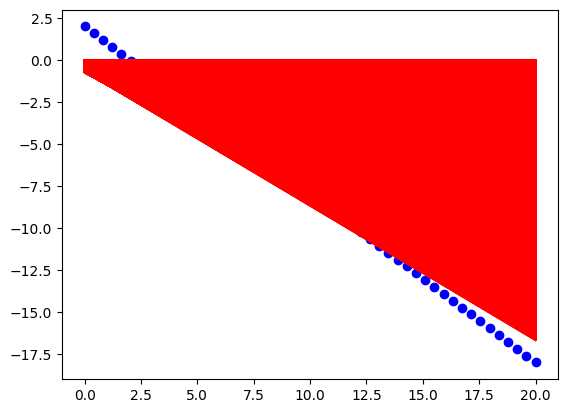

In [ ]:
plt.scatter(X,y,color='blue')
for i in range(len(hypos)):
  plt.plot(X,hypos[i],color='red')
  plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

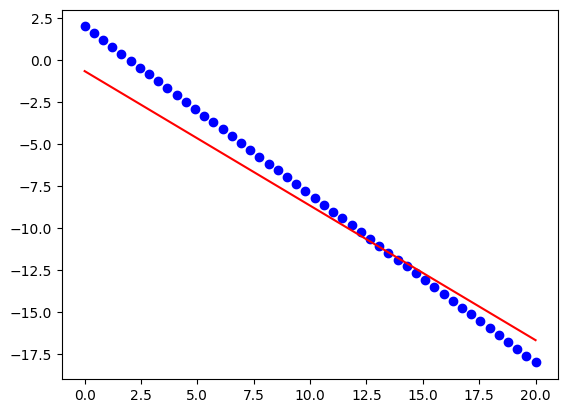

In [ ]:
plt.scatter(X,y,color='blue')
plt.plot(X,h,color='red')
plt.show

##### The following results uses alpha = 0.01, beta1 = 0.9, beta2 = 0.99, epsilon =  1e-08, and max. iterations = 5000.

In [ ]:
theta0s, theta1s, loss, theta0, theta1 , h , hypos = adam(X , y , 0.01 ,0.9, 0.99, 1e-08 ,5000)

Streaming output truncated to the last 5000 lines.
  0.76610399  0.81485936] 

j  0.3195802040930235 

grad vector  [-0.37964735  0.3477335 ] 

grad vector norm  0.5148307432931627 

**********iteration 414 **********

theta 0  0.4310600136534878 

theta 1  -0.8809483089834155 

h  [  0.43106001   0.07148928  -0.28808146  -0.6476522   -1.00722294
  -1.36679368  -1.72636442  -2.08593515  -2.44550589  -2.80507663
  -3.16464737  -3.52421811  -3.88378885  -4.24335959  -4.60293032
  -4.96250106  -5.3220718   -5.68164254  -6.04121328  -6.40078402
  -6.76035475  -7.11992549  -7.47949623  -7.83906697  -8.19863771
  -8.55820845  -8.91777918  -9.27734992  -9.63692066  -9.9964914
 -10.35606214 -10.71563288 -11.07520361 -11.43477435 -11.79434509
 -12.15391583 -12.51348657 -12.87305731 -13.23262804 -13.59219878
 -13.95176952 -14.31134026 -14.670911   -15.03048174 -15.39005247
 -15.74962321 -16.10919395 -16.46876469 -16.82833543 -17.18790617] 

errorvec  [-1.56893999 -1.52034746 -1.47175493 -1.42316

In [ ]:
r2_score(y,h)

0.9952892444628807

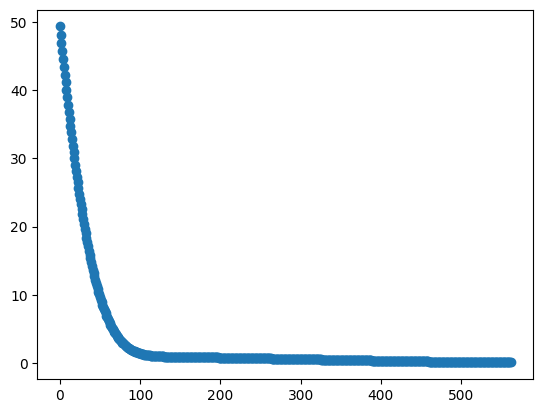

In [ ]:
epochs = list(range(len(loss)))
plt.scatter(epochs, loss)

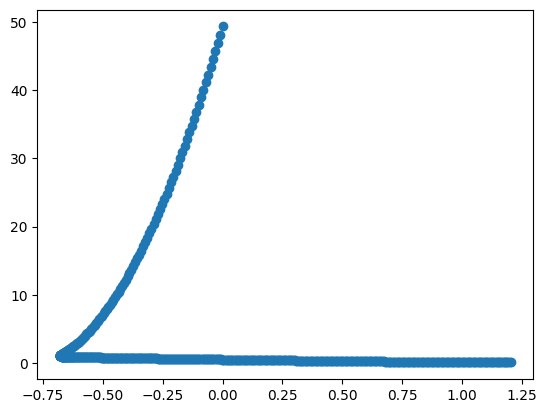

In [ ]:
plt.scatter(theta0s,loss)

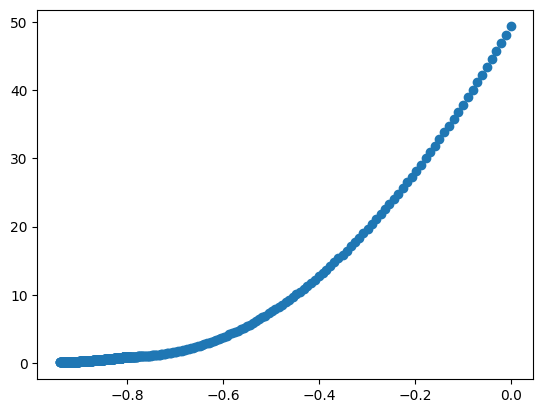

In [ ]:
plt.scatter(theta1s,loss)

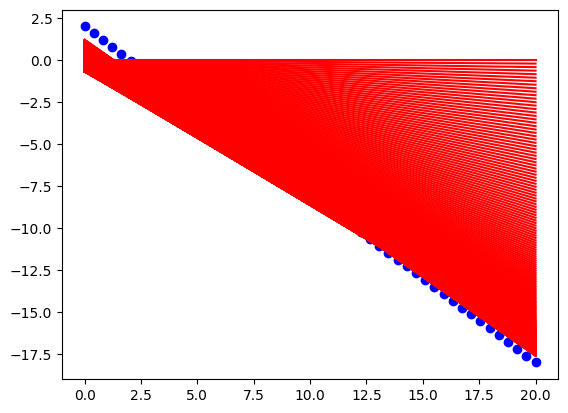

In [ ]:
plt.scatter(X,y,color='blue')
for i in range(len(hypos)):
  plt.plot(X,hypos[i],color='red')
  plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

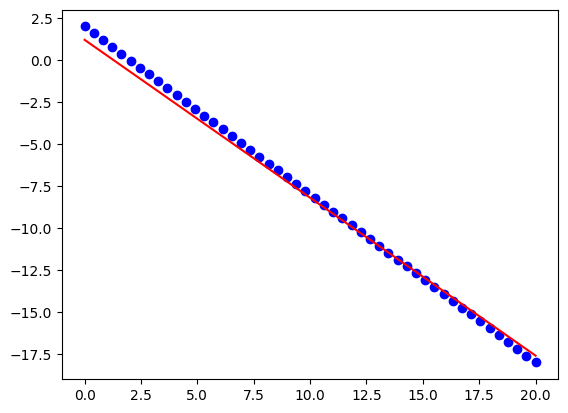

In [ ]:
plt.scatter(X,y,color='blue')
plt.plot(X,h,color='red')
plt.show